In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string

import nltk
from nltk.corpus import stopwords

In [2]:
df = pd.read_pickle('/work/NLP_Project/for_word2vec.pkl')

In [3]:
df

,title,tag,artist,year,lyrics,id,lyrics_word_count
0,Killa Cam,rap,Cam'ron,2004,killa cam killa cam cam killa cam killa cam k...,1,762
1,Can I Live,rap,JAY-Z,1996,yeah hah yeah rocafella we invite you to so...,3,548
2,Forgive Me Father,rap,Fabolous,2003,maybe cause im eatin and these bastards fiend ...,4,574
3,Down and Out,rap,Cam'ron,2004,ugh killa baby kanye this that 1970s heron ...,5,760
4,Fly In,rap,Lil Wayne,2005,so they ask me young boy what you gon do the ...,6,432
...,...,...,...,...,...,...,...
5913399,Everything Is Alright Now,pop,Chuck Bernard,2013,everything is alright now oh yes baby everythi...,7882838,63
5913401,White Lies,pop,ElementD,2019,half truth and half you didnt we say were thr...,7882840,171
5913403,Ocean,pop,Effemar,2022,dance for me now keeping yourself moving your...,7882842,166
5913406,Raise Our Hands,pop,"Culture Code, Pag & Mylo",2016,here our purpose feels alive we are more than...,7882845,184


In [8]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
nltk.download('punkt') 

[nltk_data] Downloading package punkt to /home/ucloud/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [9]:
df['tokenized_lyrics'] = df['lyrics'].apply(word_tokenize)

In [10]:
df.to_pickle('word2vec_tokenized.pkl')

In [11]:
# Train a Word2Vec model
# Train a Word2Vec model
w2v_model = Word2Vec(df['tokenized_lyrics'].to_list(), min_count=5, workers=31, window=5)


In [13]:
# Generate word vectors for each song by averaging word vectors of all words in the song
df['word2vec_lyrics'] = df['tokenized_lyrics'].apply(lambda x: np.mean([w2v_model.wv[word] for word in x if word in w2v_model.wv.key_to_index], axis=0))


/home/ucloud/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


In [4]:
#calculate number of words in lyrics
df['lyrics_word_count'] = df['lyrics'].apply(lambda x: len(str(x).split()))

In [14]:
df

,title,tag,artist,year,lyrics,id,lyrics_word_count,tokenized_lyrics,word2vec_lyrics
0,Killa Cam,rap,Cam'ron,2004,killa cam killa cam cam killa cam killa cam k...,1,762,"[killa, cam, killa, cam, cam, killa, cam, kill...","[-1.0416342, -1.8244686, -0.28164017, 1.004815..."
1,Can I Live,rap,JAY-Z,1996,yeah hah yeah rocafella we invite you to so...,3,548,"[yeah, hah, yeah, rocafella, we, invite, you, ...","[-0.071794294, -1.3259815, -0.83557093, 0.0142..."
2,Forgive Me Father,rap,Fabolous,2003,maybe cause im eatin and these bastards fiend ...,4,574,"[maybe, cause, im, eatin, and, these, bastards...","[-0.5561948, -1.3328351, -0.75972176, 0.155423..."
3,Down and Out,rap,Cam'ron,2004,ugh killa baby kanye this that 1970s heron ...,5,760,"[ugh, killa, baby, kanye, this, that, 1970s, h...","[-0.68215144, -1.4285321, -0.82841796, 0.45750..."
4,Fly In,rap,Lil Wayne,2005,so they ask me young boy what you gon do the ...,6,432,"[so, they, ask, me, young, boy, what, you, gon...","[-0.64928126, -1.543321, -0.9033364, 0.4230063..."
...,...,...,...,...,...,...,...,...,...
5913399,Everything Is Alright Now,pop,Chuck Bernard,2013,everything is alright now oh yes baby everythi...,7882838,63,"[everything, is, alright, now, oh, yes, baby, ...","[0.11393027, -0.5848491, -1.2231293, -0.729186..."
5913401,White Lies,pop,ElementD,2019,half truth and half you didnt we say were thr...,7882840,171,"[half, truth, and, half, you, didnt, we, say, ...","[-0.23599629, -2.0092504, -1.1099375, -0.07128..."
5913403,Ocean,pop,Effemar,2022,dance for me now keeping yourself moving your...,7882842,166,"[dance, for, me, now, keeping, yourself, movin...","[-0.6133733, -0.9017366, -0.86565405, -0.94078..."
5913406,Raise Our Hands,pop,"Culture Code, Pag & Mylo",2016,here our purpose feels alive we are more than...,7882845,184,"[here, our, purpose, feels, alive, we, are, mo...","[-0.13819346, -1.3463497, -0.6037392, -0.07637..."


In [15]:
df.to_pickle('word2vec.pkl')

6


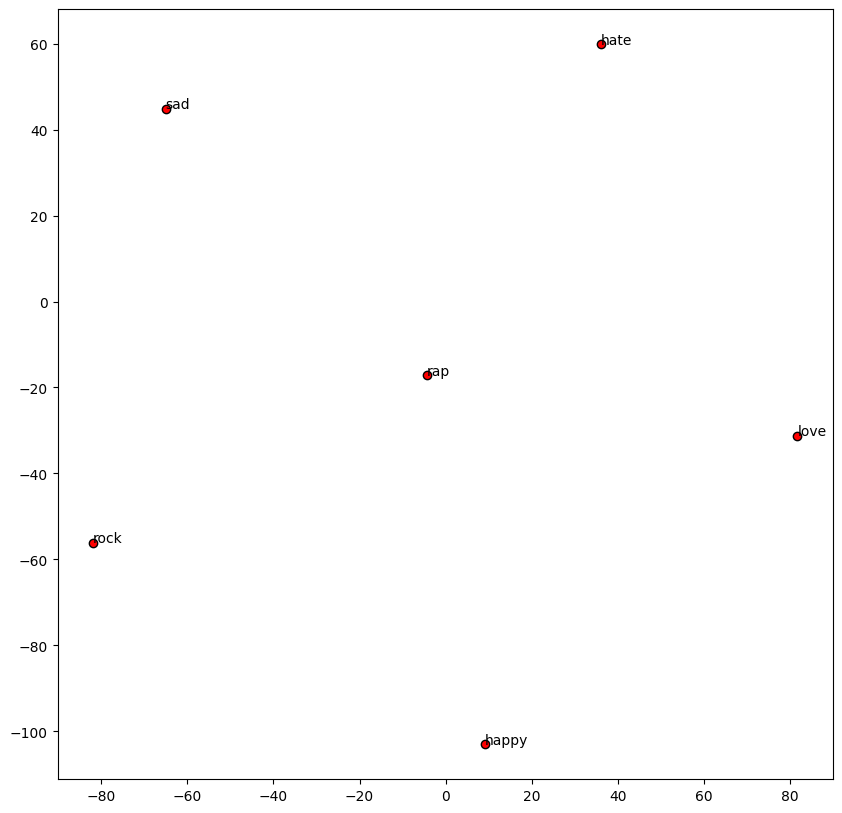

In [32]:
import numpy as np


# Choose a subset of words to visualize (optional)
chosen_words = ['rap', 'rock', 'love', 'hate', 'happy', 'sad']  # Just an example
vectors = np.array([w2v_model.wv[word] for word in chosen_words])
print(len(vectors))


# Perform t-SNE
# Perform t-SNE with perplexity less than 10
tsne = TSNE(n_components=2, random_state=42, perplexity=5)
vectors_tsne = tsne.fit_transform(vectors)

# Create a scatter plot
plt.figure(figsize=(10, 10))
plt.scatter(vectors_tsne[:, 0], vectors_tsne[:, 1], edgecolors='k', c='r')

# Add labels
for word, (x, y) in zip(chosen_words, vectors_tsne):
    plt.text(x, y, word)

plt.show()


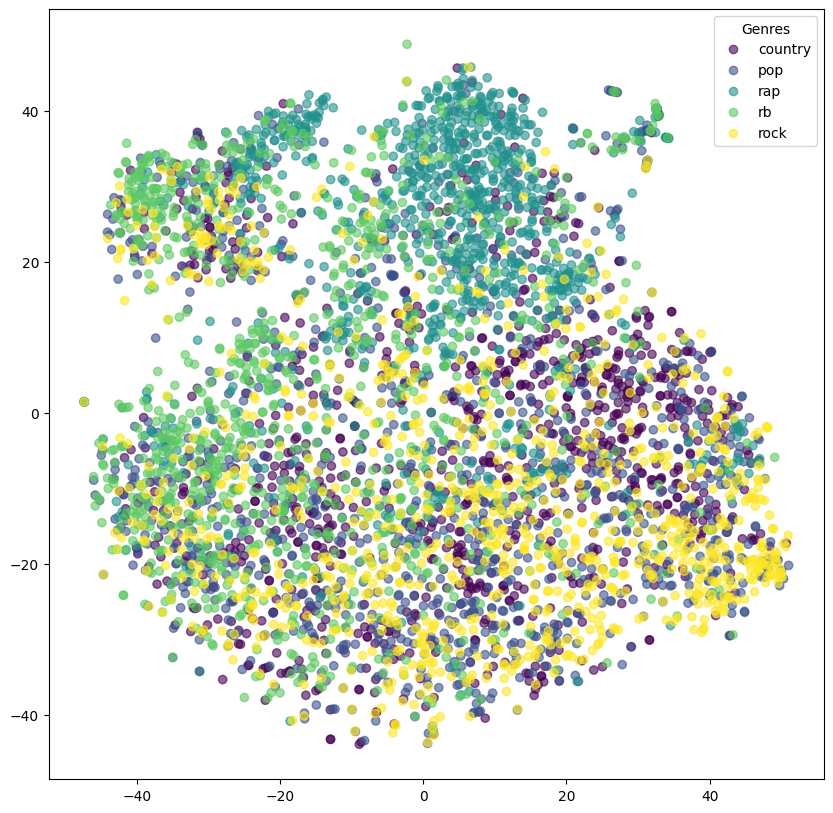

In [37]:
from sklearn.manifold import TSNE

# Sample a subset of your data
df_sample = df.groupby('tag').apply(lambda x: x.sample(n=1000, replace=True)).reset_index(drop=True)

# Create a list of vectors
vectors = np.array(df_sample['word2vec_lyrics'].tolist())

# Use t-SNE to reduce the vectors to 2 dimensions
tsne = TSNE(n_components=2, random_state=42)
vectors_2d = tsne.fit_transform(vectors)

# Create a scatter plot, using colors to represent different genres
plt.figure(figsize=(10, 10))
scatter = plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1], c=df_sample['tag'].astype('category').cat.codes, alpha=0.6)

# Create a legend
handles, labels = scatter.legend_elements(prop="colors")
plt.legend(handles, df_sample['tag'].astype('category').cat.categories, title="Genres")

plt.show()


In [30]:
#w2v_model.wv.most_similar('duck')
w2v_model.wv.most_similar(positive=['woman', 'king'], negative=['man'])



[('queen', 0.8119950890541077),
 ('goddess', 0.71310955286026),
 ('princess', 0.6624674201011658),
 ('aphrodite', 0.6412626504898071),
 ('cleopatra', 0.604162335395813),
 ('goddes', 0.6030357480049133),
 ('athena', 0.6019218564033508),
 ('empress', 0.5941806435585022),
 ('sheba', 0.5880502462387085),
 ('latifahs', 0.5849102735519409)]

In [40]:
df.shape

(3315185, 9)

In [41]:
df = df.dropna(subset=['word2vec_lyrics'])

In [43]:
df.shape

(3314995, 9)

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

# Create a list of vectors and convert to numpy array
X = np.array(df['word2vec_lyrics'].tolist())
y = df['tag']

# Split the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features to have mean=0 and variance=1
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Train a LinearSVC model
model = LinearSVC(max_iter=10000, verbose=1)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))


[LibLinear].......................................................................................